In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.model_selection as skmodel
from sklearn import tree
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold


from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import LinearSVC, SVC
#设置出图显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
diabetes = pd.read_csv('diabetes11.csv')

In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# data overview
print ('Rows     : ', diabetes.shape[0])
print ('Columns  : ', diabetes.shape[1])
print ('\nFeatures : \n', diabetes.columns.tolist())
print ('\nMissing values :  ', diabetes.isnull().sum().values.sum())
print ('\nUnique values :  \n', diabetes.nunique())

Rows     :  768
Columns  :  9

Features : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing values :   0

Unique values :  
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [5]:
# proportion of diabetes patients (about 35% having diabetes)
diabetes.Outcome.value_counts()[1] / diabetes.Outcome.count()

0.3489583333333333

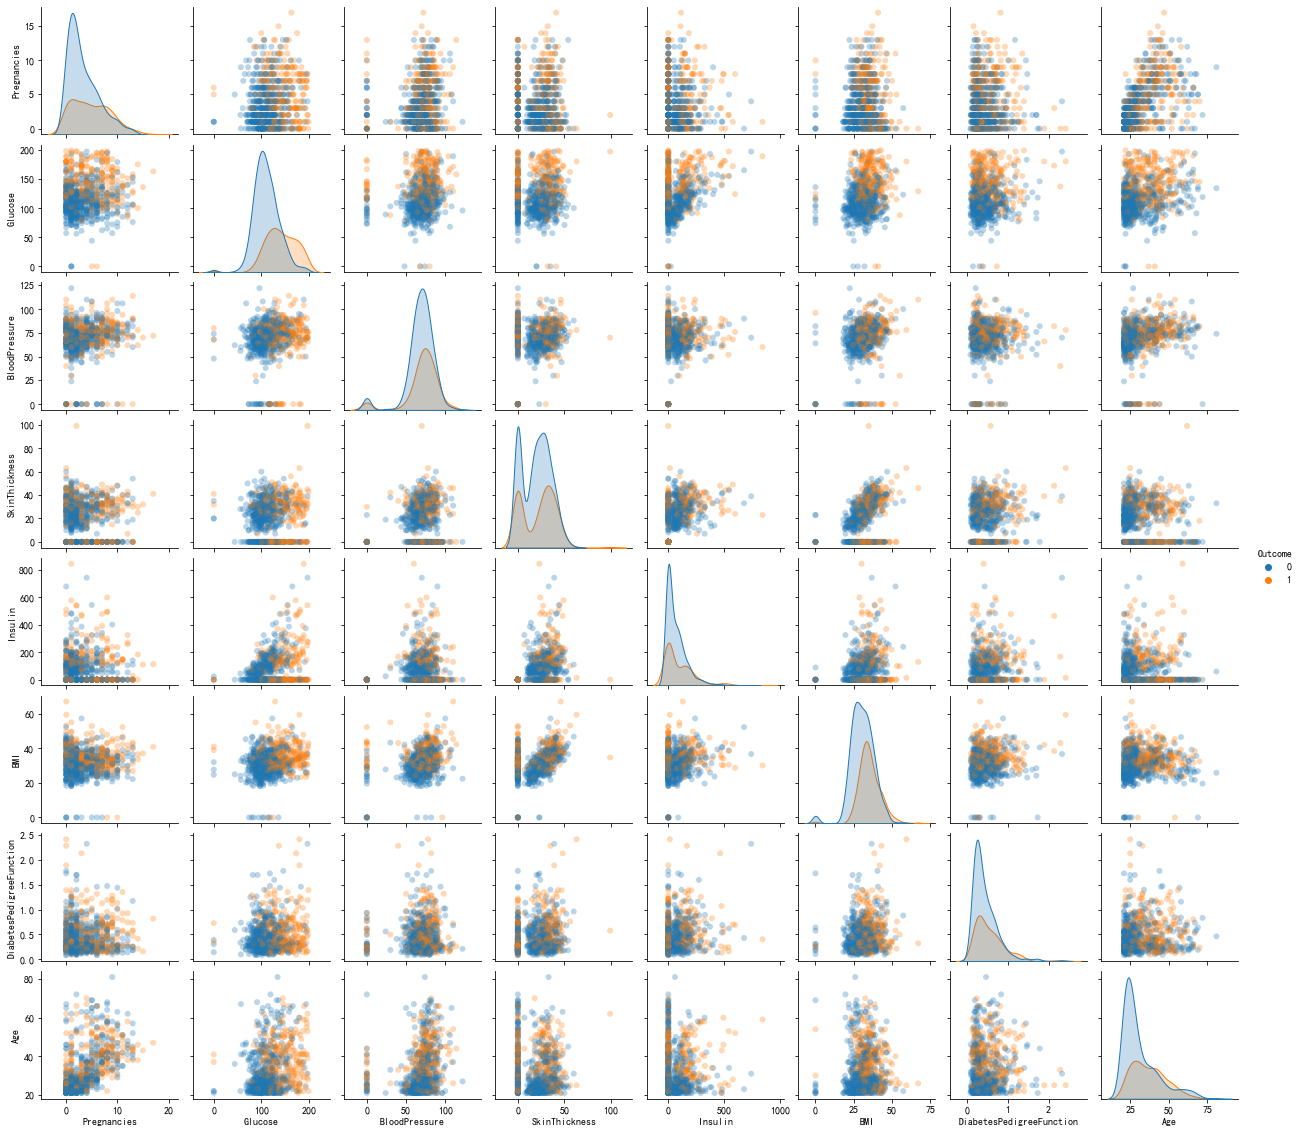

In [6]:
# to visualise pair plot
sns.pairplot(diabetes, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

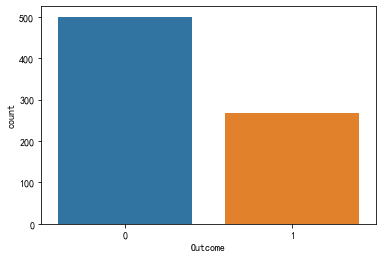

In [7]:
sns.countplot(diabetes['Outcome'],label="Count")

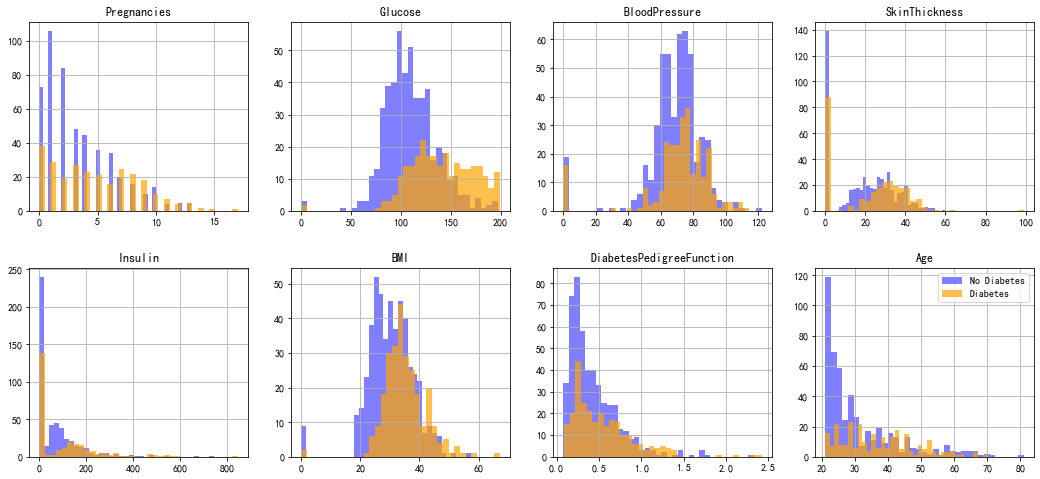

In [8]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    diabetes[diabetes.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    diabetes[diabetes.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

逻辑回归

In [9]:
x_train,x_test,y_train,y_test = skmodel.train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'],
    diabetes['Outcome'], stratify=diabetes['Outcome'],
    random_state=42,train_size=0.7)
x_train=x_train.astype('int')
y_train=y_train.astype('int')
x_test=x_test.astype('int')
y_test=y_test.astype('int')

In [10]:
logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))
logregl = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logregl.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logregl.score(x_test, y_test)))
logreg5 = LogisticRegression(C = 1,solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg5.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg5.score(x_test, y_test)))
logreg5 = LogisticRegression(C = 100,solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg5.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg5.score(x_test, y_test)))

Training set score : 0.786
Test set score: 0.749
Training set score : 0.784
Test set score: 0.736
Training set score : 0.786
Test set score: 0.749
Training set score : 0.791
Test set score: 0.740


Text(0, 0.5, 'ACC')

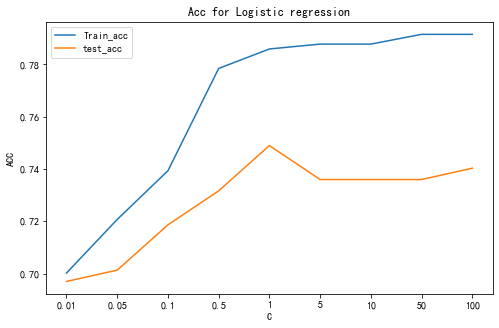

In [11]:
x=[10,20,30,40,50,60,70,80,90]
C = [0.01,0.05,0.1,0.5,1,5,10,50,100]
train_acc = []
test_acc = []
for k2 in C:
    logreg1 = LogisticRegression(C = k2,solver='liblinear').fit(x_train, y_train)
    train_acc.append(logreg1.score(x_train, y_train))
    test_acc.append(logreg1.score(x_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(x,train_acc,label='Train_acc')
plt.plot(x,test_acc,label='test_acc')
plt.legend()
_ = plt.xticks(x,C) 
plt.title('Acc for Logistic regression')
plt.xlabel('C')
plt.ylabel('ACC')

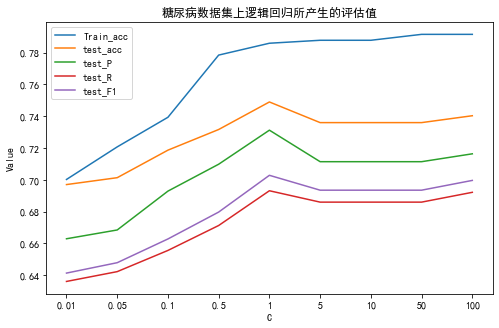

In [12]:
#查准率，召回率,f1
x=[10,20,30,40,50,60,70,80,90]  
x_index = [0.01,0.05,0.1,0.5,1,5,10,50,100]
train_acc1 = []
y = []
#C1 = []
test_accuracy_score = []
test_precision_score = []
test_recall_score = []
test_f1_score = []
for k3 in x_index:
    logreg2 = LogisticRegression(C = k3,solver='liblinear').fit(x_train, y_train)
    y_pred=logreg2.predict(x_test)
   # C1.append(k3)
    train_acc1.append(logreg2.score(x_train, y_train))
    test_accuracy_score.append(accuracy_score(y_test, y_pred))
    test_precision_score.append(precision_score(y_test, y_pred, average='macro'))
    test_recall_score.append(recall_score(y_test, y_pred, average='macro'))
    test_f1_score.append(f1_score(y_test, y_pred, average='macro'))
plt.figure(figsize=(8,5))

 #虚假的x值，用来等间距分割
 # x 轴显示的刻度
plt.title('糖尿病数据集上逻辑回归所产生的评估值')
plt.xlabel('C')
plt.ylabel('Value')
plt.plot(x,train_acc1,label='Train_acc')
plt.plot(x,test_accuracy_score,label='test_acc')
plt.plot(x,test_precision_score,label='test_P')
plt.plot(x,test_recall_score,label='test_R')
plt.plot(x,test_f1_score,label='test_F1')

plt.legend()
_ = plt.xticks(x,x_index) 
plt.show()




In [13]:
"""
When the regularization parameter C is set to 100,
the accuracy of the model on the training set is slightly improved.
but the accuracy on the test set is slightly reduced.
"""
logreg100 = LogisticRegression(C=100, solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg100.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(x_test, y_test)))


Training set score : 0.791
Test set score: 0.740


In [14]:
logreg001 = LogisticRegression(C=0.001, solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg001.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(x_test, y_test)))


Training set score : 0.691
Test set score: 0.671


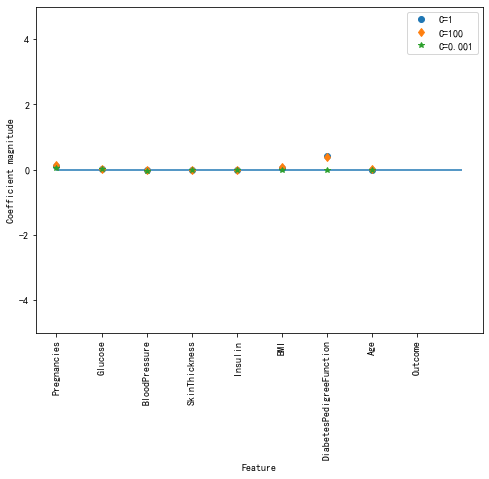

In [15]:
diabetes_features = [x for i, x in enumerate(diabetes.columns) if i != 17]

plt.figure(figsize=(8, 6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, 'd', label="C=100")
plt.plot(logreg001.coef_.T, '*', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()



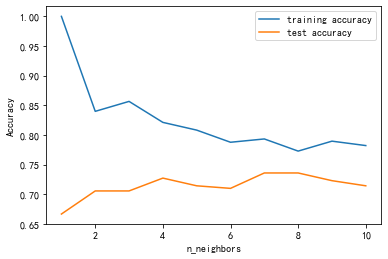

In [16]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the models
    knn.fit(x_train, y_train)  # use x_train as train data and y_train as target value
    training_accuracy.append(knn.score(x_train, y_train))  # record training set accuracy
    test_accuracy.append(knn.score(x_test, y_test))  # record test set accuracy

'''
The relationship between the training set and the test set on the model prediction
accuracy (Y-axis) and the number of nearest neighbors (X-axis) is demonstrated
'''
plt.figure()
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [17]:
x_train = x_train.astype(np.float64)
y_train = y_train.astype(np.float64)
x_test = x_test.astype(np.float64)
y_test = y_test.astype(np.float64)


In [18]:
arr_Svm = []

In [19]:
#调用svm算法，拟合模型

svc = SVC(C=100, kernel='linear')
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))


Accuracy on training set: 0.79
Accuracy on test set: 0.73


In [20]:
#调用svm算法，拟合模型
from sklearn import svm
svc = svm.SVC(C=1, kernel='linear')
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))


Accuracy on training set: 0.79
Accuracy on test set: 0.73


In [21]:
arr_Svm.append()

TypeError: append() takes exactly one argument (0 given)

In [ ]:
#调用svm算法，拟合模型
from sklearn import svm
svc = svm.SVC(C=10, kernel='linear')
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))


In [66]:
#调用svm算法，拟合模型
from sklearn import svm
svc = svm.SVC(C=50,kernel='linear')
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))


Accuracy on training set: 0.79
Accuracy on test set: 0.73


In [67]:
#调用svm算法，拟合模型
from sklearn import svm
svc = svm.SVC(C=500, kernel='linear')
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))


Accuracy on training set: 0.79
Accuracy on test set: 0.73


In [68]:
#调用svm算法，拟合模型
from sklearn import svm
svc = svm.SVC(C=1000, kernel='linear')
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))


Accuracy on training set: 0.79
Accuracy on test set: 0.73


Text(0, 0.5, 'ACC')

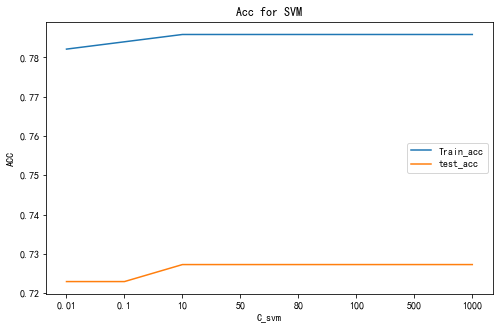

In [74]:
#支持向量机，速度太慢
x=[1,2,3,4,5,6,7,8]  
C_svm = [0.01,0.1,10,50,80,100,500,1000]
train_acc_svm = []
test_acc_svm = []

for k4 in C_svm:
    svc = svm.SVC(C=k4, kernel='linear')
    a = svc.fit(x_train, y_train)
    
    train_acc_svm.append(a.score(x_train, y_train))
    test_acc_svm.append(a.score(x_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(x,train_acc_svm,label='Train_acc')
plt.plot(x,test_acc_svm,label='test_acc')
_ = plt.xticks(x,C_svm) 
plt.legend()
plt.title('Acc for SVM')
plt.xlabel('C_svm')
plt.ylabel('ACC')

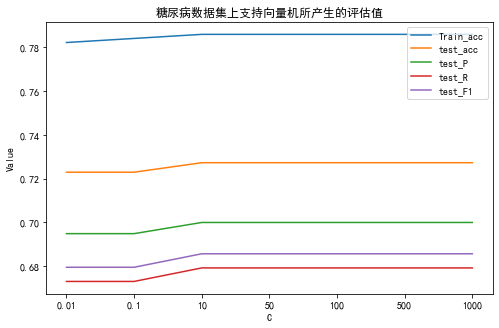

In [89]:
#查准率，召回率,f1
x=[1,2,3,4,5,6,7]  
C_svm = [0.01,0.1,10,50,100,500,1000]
train_acc1 = []
y = []
#C1 = []
test_accuracy_score = []
test_precision_score = []
test_recall_score = []
test_f1_score = []
for k7 in C_svm:
    svc = svm.SVC(C=k7, kernel='linear').fit(x_train, y_train)
    y_pred=svc.predict(x_test)
   # C1.append(k3)
    train_acc1.append(svc.score(x_train, y_train))
    test_accuracy_score.append(accuracy_score(y_test, y_pred))
    test_precision_score.append(precision_score(y_test, y_pred, average='macro'))
    test_recall_score.append(recall_score(y_test, y_pred, average='macro'))
    test_f1_score.append(f1_score(y_test, y_pred, average='macro'))
plt.figure(figsize=(8,5))

 #虚假的x值，用来等间距分割
 # x 轴显示的刻度
plt.title('糖尿病数据集上支持向量机所产生的评估值')
plt.xlabel('C')
plt.ylabel('Value')
plt.plot(x,train_acc1,label='Train_acc')
plt.plot(x,test_accuracy_score,label='test_acc')
plt.plot(x,test_precision_score,label='test_P')
plt.plot(x,test_recall_score,label='test_R')
plt.plot(x,test_f1_score,label='test_F1')

plt.legend()
_ = plt.xticks(x,C_svm) 
plt.show()

In [92]:
## Baseline model performance evaluation
# kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# to give model baseline report in dataframe 
''''def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))#cv交叉验证折数
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken: to be used for comparison later
    return df_model

# to evaluate baseline models


# to concat all models
df_models = pd.concat([baseline_report(logit7, x_train, x_test, y_train, y_test, 'LogisticRegression'),
                      
                       baseline_report(randomforest, x_train, x_test, y_train, y_test, 'RandomForest'),
                       baseline_report(svc, x_train, x_test, y_train, y_test, 'SVC')
                       ], axis=0).reset_index()

df_models = df_models.drop('index', axis=1)
df_models'''

"'def baseline_report(model, X_train, X_test, y_train, y_test, name):\n    model.fit(X_train, y_train)\n    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))#cv交叉验证折数\n    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))\n    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))\n    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))\n    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))\n    y_pred = model.predict(X_test)\n    df_model = pd.DataFrame({'model'        : [name],\n                             'accuracy'     : [accuracy],\n                             'precision'    : [precision],\n                             'recall'       : [recall],\n                             'f1score'      : [f1score],\n                             'rocauc'       : [rocauc],\n                            

In [60]:

LG_score = []

In [93]:
logit7 = LogisticRegression(C = 1,solver='liblinear')
svc = svm.SVC(kernel='rbf',C=1)
randomforest = RandomForestClassifier(max_depth = 4,n_estimators=100, random_state=42)
model1 = logit7.fit(x_train, y_train)

model3 = svc.fit(x_train, y_train)
model4 = randomforest.fit(x_train, y_train)
def baseline_report_arr(X_train, X_test, y_train, y_test, name):
    arr_score = []#存放每个评估值的数组
    arr_score.append(np.mean(cross_val_score(model1,X_train, y_train, cv=kf, scoring=name)))
    arr_score.append(np.mean(cross_val_score(model3,X_train, y_train, cv=kf, scoring=name)))#cv交叉验证折数
    arr_score.append(np.mean(cross_val_score(model4,X_train, y_train, cv=kf, scoring=name)))
    return arr_score
baseline_report_arr(x_train, x_test, y_train, y_test, 'accuracy')
baseline_report_arr(x_train, x_test, y_train, y_test, 'precision')

[0.7445833333333333, 0.7480889480889481, 0.7526274651274651]

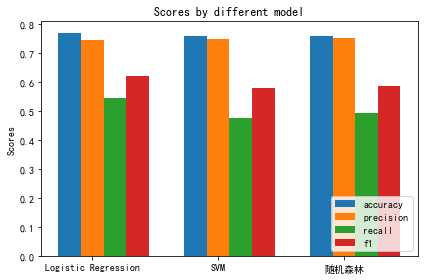

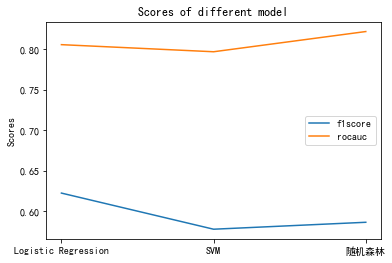

In [94]:
labels = ['Logistic Regression','SVM','随机森林']
accuracy = baseline_report_arr(x_train, x_test, y_train, y_test, 'accuracy')
precision = baseline_report_arr(x_train, x_test, y_train, y_test, 'precision')
recall = baseline_report_arr(x_train, x_test, y_train, y_test, 'recall')
f1score = baseline_report_arr(x_train, x_test, y_train, y_test, 'f1')
rocauc = baseline_report_arr(x_train, x_test, y_train, y_test, 'roc_auc')

x = np.arange(len(labels))  # the label locations
width = 0.18  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width, accuracy, width, label='accuracy')
rects2 = ax.bar(x, precision, width, label='precision')
rects3 = ax.bar(x+width, recall, width, label='recall')
rects4 = ax.bar(x+2*width, f1score, width, label='f1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by different model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
fig.tight_layout()
plt.show()
fig1, ax1 = plt.subplots()
ax1.plot(labels, f1score, label="f1score")
ax1.plot(labels, rocauc, label="rocauc")
ax1.set_ylabel('Scores')
ax1.set_title('Scores of different model')
ax1.legend()

In [81]:
accuracy,precision,recall,f1score

([0.776674989596338, 0.7636079900124844, 0.758073241781107],
 [0.7527785868578708, 0.7462606837606839, 0.7314351851851851],
 [0.5458669354838709, 0.49227150537634407, 0.49210349462365593],
 [0.6287311623135293, 0.5885402878627145, 0.5846758755081659])

In [72]:
## Baseline model performance evaluation
# kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# to give model baseline report in dataframe 
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))#cv交叉验证折数
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken: to be used for comparison later
    return df_model

# to evaluate baseline models

# to concat all models
df_models = pd.concat([baseline_report(logit7, x_train, x_test, y_train, y_test, 'LogisticRegression'),
                      
                       baseline_report(randomforest, x_train, x_test, y_train, y_test, 'RandomForest'),
                       baseline_report(svc, x_train, x_test, y_train, y_test, 'SVC')
                       ], axis=0).reset_index()

df_models = df_models.drop('index', axis=1)
df_models

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,LogisticRegression,0.770976,0.744583,0.545377,0.622652,0.805320,0
1,RandomForest,0.759917,0.752627,0.492603,0.586725,0.821461,0
2,SVC,0.757979,0.748089,0.476245,0.578191,0.796588,0


In [64]:
logloss = []
y_pred1 = model1.predict(x_test)
y_pred2 = model4.predict(x_test)
y_pred3 = model3.predict(x_test)
logloss.append(log_loss(y_test, y_pred1))
logloss.append(log_loss(y_test, y_pred2))
logloss.append(log_loss(y_test, y_pred3))
logloss

[9.120701955132406, 8.82166839152898, 9.41974590311804]

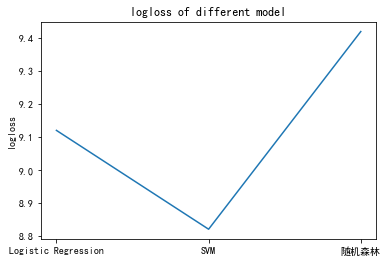

In [65]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('logloss')
ax1.set_title('logloss of different model')
ax1.plot(labels, logloss, label="f1score")

In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
"""
A random forest of 100 trees was used to centralize the diabetes data
"""
# here I use default settings
rf = RandomForestClassifier(n_estimators=7, random_state=42)
rf.fit(x_train, y_train)
print("\nPreliminary results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))
rf2 = RandomForestClassifier(n_estimators=200, random_state=42)
rf2.fit(x_train, y_train)
print("\nPreliminary results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(rf2.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf2.score(x_test, y_test)))


Preliminary results of decision tree fitting:
Accuracy on training set: 0.974
Accuracy on test set: 0.675

Preliminary results of decision tree fitting:
Accuracy on training set: 1.000
Accuracy on test set: 0.740


In [36]:
# now, the max_depth = 4
rf1 = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print("\nFinally results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))
"""By the results we could find the accuracy is reduced"""



Finally results of decision tree fitting:
Accuracy on training set: 0.825
Accuracy on test set: 0.740


'By the results we could find the accuracy is reduced'

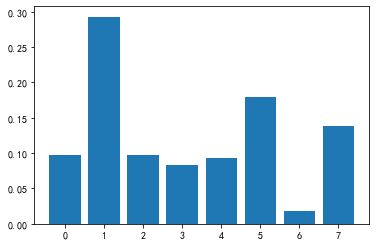

In [37]:
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.show()

Text(0, 0.5, 'ACC')

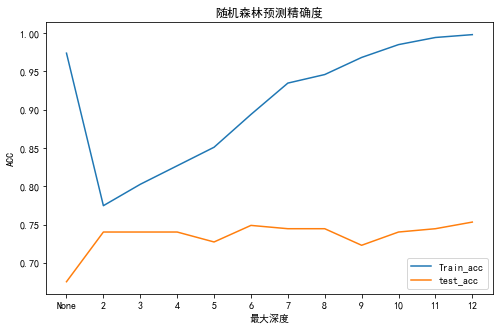

In [38]:
x=[1,2,3,4,5,6,7,8,9,10,11,12]
C = ['None',2,3,4,5,6,7,8,9,10,11,12]
train_acc = []
test_acc = []
train_acc.append(rf.score(x_train, y_train))
test_acc.append(rf.score(x_test, y_test))
for k6 in range(2,13):
    rf = RandomForestClassifier(max_depth=k6, n_estimators=100, random_state=42).fit(x_train, y_train)
    train_acc.append(rf.score(x_train, y_train))
    test_acc.append(rf.score(x_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(x,train_acc,label='Train_acc')
plt.plot(x,test_acc,label='test_acc')
plt.legend()
_ = plt.xticks(x,C) 
plt.title('随机森林预测精确度')
plt.xlabel('最大深度')
plt.ylabel('ACC')

Text(0, 0.5, 'ACC')

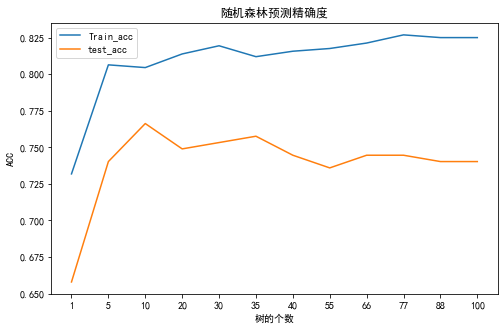

In [103]:
x=[1,2,3,4,5,6,7,8,9,10,11,12]
n_estimators = [1,5,10,20,30,35,40,55,66,77,88,100]
train_acc = []
test_acc = []
for k6 in n_estimators:
    rf = RandomForestClassifier(max_depth=4, n_estimators=k6, random_state=0).fit(x_train, y_train)
    train_acc.append(rf.score(x_train, y_train))
    test_acc.append(rf.score(x_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(x,train_acc,label='Train_acc')
plt.plot(x,test_acc,label='test_acc')
plt.legend()
_ = plt.xticks(x,n_estimators) 
plt.title('随机森林预测精确度')
plt.xlabel('树的个数')
plt.ylabel('ACC')

Text(0, 0.5, 'value')

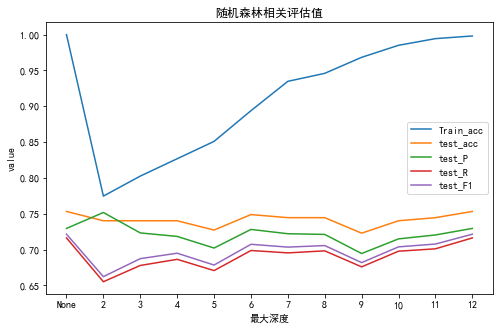

In [40]:
x = [1,2,3,4,5,6,7,8,9,10,11,12] 
C = ['None',2,3,4,5,6,7,8,9,10,11,12]
train_acc1 = []
test_accuracy_score = []
test_precision_score = []
test_recall_score = []
test_f1_score = []
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(x_train, y_train)
y_pred=rf.predict(x_test)
train_acc1.append(rf.score(x_train, y_train))
test_accuracy_score.append(rf.score(x_test, y_test))
test_precision_score.append(precision_score(y_test, y_pred, average='macro'))
test_recall_score.append(recall_score(y_test, y_pred, average='macro'))
test_f1_score.append(f1_score(y_test, y_pred, average='macro'))
for k6 in  range(2,13):
    rf = RandomForestClassifier(max_depth=k6, n_estimators=100, random_state=42).fit(x_train, y_train)
    y_pred=rf.predict(x_test)
    train_acc1.append(rf.score(x_train, y_train))
    test_accuracy_score.append(accuracy_score(y_test, y_pred))
    test_precision_score.append(precision_score(y_test, y_pred, average='macro'))
    test_recall_score.append(recall_score(y_test, y_pred, average='macro'))
    test_f1_score.append(f1_score(y_test, y_pred, average='macro'))
plt.figure(figsize=(8,5))
plt.plot(x,train_acc1,label='Train_acc')
plt.plot(x,test_accuracy_score,label='test_acc')
plt.plot(x,test_precision_score,label='test_P')
plt.plot(x,test_recall_score,label='test_R')
plt.plot(x,test_f1_score,label='test_F1')
plt.legend()
_ = plt.xticks(x,C) 
plt.title('随机森林相关评估值')
plt.xlabel('最大深度')
plt.ylabel('value')

In [96]:
svc = svm.SVC(C=1,kernel='linear')
svc.fit(x_train, y_train)
yprevisao = svc.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp=confusion_matrix(y_test, yprevisao).ravel()
cm = np.array(confusion_matrix(y_test,yprevisao, labels=[0,1]))
avaliacao = pd.DataFrame(cm,index=['nao tem diabetes','tem diabetes'], 
                            columns=['previsto sem diabetes', 'previsto com diabetes'])
avaliacao,tn, fp, fn, tp

(                  previsto sem diabetes  previsto com diabetes
 nao tem diabetes                    127                     23
 tem diabetes                         40                     41,
 127,
 23,
 40,
 41)

In [41]:
rf = RandomForestClassifier(max_depth = 4,n_estimators=100, random_state=42).fit(x_train, y_train)
yprevisao = rf.predict(x_test)

bestmodel = rf

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(x_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [5,5])
    sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no diabetes', 'diabetes'],
           yticklabels=['no diabetes', 'diabetes']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

# Let's see how our confusion matrix changes with changes to the cutoff! 
from ipywidgets import interactive, FloatSlider
# bestmodel = LogisticRegression(C = optimal_c)
# bestmodel.fit(X_train, y_train)
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [45]:
log5 = LogisticRegression(C = 1,solver='liblinear').fit(x_train, y_train)
yprevisao = log.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp=confusion_matrix(y_test, yprevisao).ravel()
cm = np.array(confusion_matrix(y_test,yprevisao, labels=[0,1]))
avaliacao = pd.DataFrame(cm,index=['nao tem diabetes','tem diabetes'], 
                            columns=['previsto sem diabetes', 'previsto com diabetes'])
avaliacao,tn, fp, fn, tp

(                  previsto sem diabetes  previsto com diabetes
 nao tem diabetes                    132                     18
 tem diabetes                         40                     41,
 132,
 18,
 40,
 41)

In [42]:
log = LogisticRegression(C = 1,solver='liblinear').fit(x_train, y_train)
yprevisao = log.predict(x_test)

bestmodel = log

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(x_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [5,5])
    sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no diabetes', 'diabetes'],
           yticklabels=['no diabetes', 'diabetes']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

# Let's see how our confusion matrix changes with changes to the cutoff! 
from ipywidgets import interactive, FloatSlider
# bestmodel = LogisticRegression(C = optimal_c)
# bestmodel.fit(X_train, y_train)
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [163]:
#调用svm算法，拟合模型
from sklearn import svm
svc = svm.SVC(C=10000)
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))


Accuracy on training set: 0.88
Accuracy on test set: 0.70


In [142]:
#调用svm算法，拟合模型
from sklearn import svm
svc = svm.SVC(C=1)
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))


Accuracy on training set: 0.78
Accuracy on test set: 0.74


Text(0, 0.5, 'ACC')

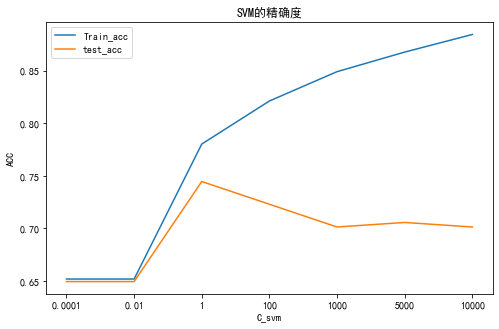

In [169]:
#支持向量机，速度太慢
x=[1,2,3,4,5,6,7]  
C_svm = [0.0001,0.01,1,100,1000,5000,10000]
train_acc_svm = []
test_acc_svm = []

for k8 in C_svm:
    svc = svm.SVC(C=k8)
    a = svc.fit(x_train, y_train)
    
    train_acc_svm.append(a.score(x_train, y_train))
    test_acc_svm.append(a.score(x_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(x,train_acc_svm,label='Train_acc')
plt.plot(x,test_acc_svm,label='test_acc')
_ = plt.xticks(x,C_svm) 
plt.legend()
plt.title('SVM的精确度')
plt.xlabel('C_svm')
plt.ylabel('ACC')

In [167]:
linearsvc = LinearSVC( C=0.0001, random_state=42, max_iter=1000)
#svc = SVC(C=10000)
linearsvc.fit(x_train, y_train)
print("Accuracy on training set: {:.5f}".format(linearsvc.score(x_train, y_train)))
print("Accuracy on test set: {:.5f}".format(linearsvc.score(x_test, y_test)))

Accuracy on training set: 0.69460
Accuracy on test set: 0.66234


Text(0, 0.5, 'ACC')

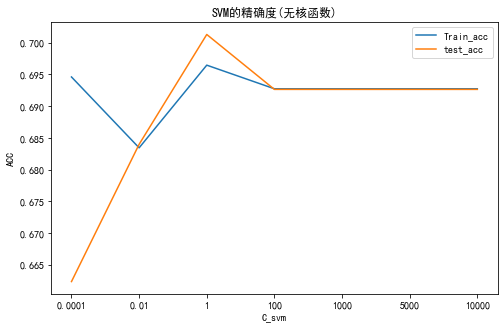

In [168]:
x=[1,2,3,4,5,6,7]  
C_svm = [0.0001,0.01,1,100,1000,5000,10000]
train_acc_svm = []
test_acc_svm = []

for k9 in C_svm:
    linearsvc = LinearSVC( C=k9, random_state=42, max_iter=1000).fit(x_train, y_train)
    
    train_acc_svm.append(linearsvc.score(x_train, y_train))
    test_acc_svm.append(linearsvc.score(x_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(x,train_acc_svm,label='Train_acc')
plt.plot(x,test_acc_svm,label='test_acc')
_ = plt.xticks(x,C_svm) 
plt.legend()
plt.title('SVM的精确度(无核函数)')
plt.xlabel('C_svm')
plt.ylabel('ACC')

In [23]:
linearsvc = LinearSVC( C=1, random_state=42, max_iter=1000).fit(x_train, y_train)
#svc = SVC(C=10000)

print("Accuracy on training set: {:.5f}".format(linearsvc.score(x_train, y_train)))
print("Accuracy on test set: {:.5f}".format(linearsvc.score(x_test, y_test)))

Accuracy on training set: 0.69646
Accuracy on test set: 0.70130


In [26]:
svc = svm.SVC(C=1)
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))
y_pred=svc.predict(x_test)
print(f1_score(y_test, y_pred, average='macro'))

Accuracy on training set: 0.78
Accuracy on test set: 0.74
0.685685293235857


In [52]:
def model_report(model, X_train, X_test, y_train, y_test, model_name):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                  # eg [ 0.0001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5, 0.5998, 0.6996, 0.7994, 0.8992, 0.9999 ]
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                  # eg 0.3xx [ 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  # eg 0.30x [ 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31 ]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display f1score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    accuracy      = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
#     y_pred = [1 if x==True else 0 if x==False else x for x in y_pred]   # .predict->0/1; .predict_proba->False/True
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    y_pred = model.predict_proba(X_test)[:,1]   # use this at optimal th, for AUC and logloss
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(rocauc))
    logloss      = log_loss(y_test, y_pred)   # same result using y_pred = model.predict_proba(X_test)
    print(model_name, 'Log-loss: {:.4f}'.format(logloss))

    df_model = pd.DataFrame({'model'        : [model_name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [1000]       })   # timetaken for comparison later
    return df_model


Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5192,  0.100->0.5442,  0.200->0.6356,  0.300->0.6878,  0.400->0.6335,  0.500->0.5857,  0.600->0.5082,  0.700->0.4182,  0.800->0.2198,  0.900->0.0482,  1.000->0.0000,  
Looping decimal place 2
0.200->0.6356,  0.210->0.6438,  0.220->0.6579,  0.230->0.6607,  0.240->0.6759,  0.250->0.6854,  0.260->0.7019,  0.270->0.7024,  0.280->0.7000,  0.290->0.7010,  0.300->0.6878,  0.310->0.6811,  0.320->0.6848,  0.330->0.6923,  0.340->0.6818,  0.350->0.6818,  0.360->0.6743,  0.370->0.6782,  0.380->0.6588,  0.390->0.6506,  0.400->0.6335,  
Looping decimal place 3
0.260->0.7019,  0.261->0.7053,  0.262->0.7087,  0.263->0.7087,  0.264->0.7087,  0.265->0.7087,  0.266->0.7087,  0.267->0.7087,  0.268->0.7024,  0.269->0.7024,  0.270->0.7024,  0.271->0.7024,  0.272->0.7024,  0.273->0.7024,  0.274->0.7030,  0.275->0.7065,  0.276->0.7000,  0.277->0.7000,  0.278->0.7000,  0.279->0.7000,  0.2

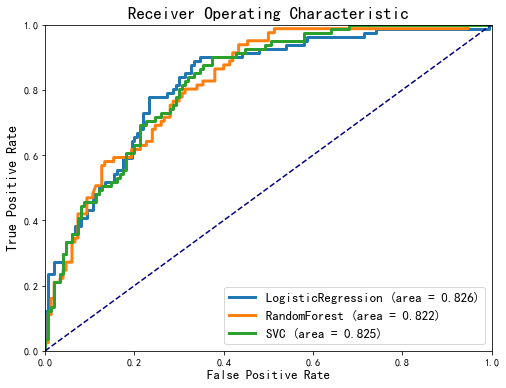

In [58]:

svc = svm.SVC(kernel='rbf',C=1,probability=True)
rf = RandomForestClassifier(max_depth = 4,n_estimators=100, random_state=42)
# plot the ROC curves
model4 = model_report(log5, x_train, x_test, y_train, y_test, 'LogisticRegression')
model8 = model_report(svc, x_train, x_test, y_train, y_test, 'SVC')
model7 = model_report(rf, x_train, x_test, y_train, y_test, 'RandomForest')
df_models_tuned = pd.concat([model4,model7,model8],axis = 0).reset_index()
plt.figure(figsize=(8,6))

model_name = [log5, svc, rf]

for i in range(3):
    y_pred = model_name[i].predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, lw=3, label=df_models_tuned.model[i] + ' (area = %0.3f)' % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()